esrf, one of OPA's examples

In [1]:
from math import pi
from simplestoragering import * 

the unit of energy is MeV, particle type is electron

In [2]:
Particle.set_energy(6000)
D1 = Drift('D1', 3.169600)
D2 = Drift('D2', 0.300000)
D3 = Drift('D2', 0.350000)
D4 = Drift('D3', 1.072250)
D5 = Drift('D4', 1.071750)
D6 = Drift('D5', 0.380000)
D7 = Drift('D6', 0.450000)
QD1 = Quadrupole('QD1', 0.400000, -0.319693)
QF1 = Quadrupole('QF1', 0.900000, 0.529010)
QD2 = Quadrupole('QD2', 0.500000, -0.524120)
QD3 = Quadrupole('QD3', 0.400000, -0.693040)
QF2 = Quadrupole('QF2', 0.500000, 0.759003)
QD4 = Quadrupole('QD4', 0.500000, -0.770779)
QF3 = Quadrupole('QF3', 0.900000, 0.819497)
QD5 = Quadrupole('QD5', 0.400000, -0.547108)

B1 = Dipole('B1', 2.157280, 5.289780 * pi / 180, 2.812500 * pi / 180, 2.477300 * pi / 180)
B2 = Dipole('B2', 0.292710, 0.335180 * pi / 180, -2.477300 * pi / 180, 2.812500 * pi / 180)

SF = Sextupole('SF', 0.100000, 31.03000)
SD = Sextupole('SD', 0.100000, -17.75000)
S1 = Sextupole('S1', 0.100000, 20.00000)
S2 = Sextupole('S2', 0.100000, -22.60000)
S3 = Sextupole('S3', 0.100000, -10.80000)
S4 = Sextupole('S4', 0.100000, 18.10000)

MHB = [QD2, D3, S2, D3, QF1, D2, S1, D2, QD1, D1]
DBA = [D4, B1, B2, D5, QD3, D2, SD, D6, QF2, D7, SF, D7, QF2, D6, SD, D2, QD3, D5, B2, B1, D4]
MLB = [QD4, D2, S3, D3, QF3, D2, S4, D2, QD5, D1]
MHB.reverse()
segment1 = MHB + DBA + MLB
segment2 = copy.deepcopy(segment1)
segment2.reverse()
segment = segment1 + segment2

the Step class stored a dictionary of calculation step and magnet type. 0 is for all type. 100-199 is drift, 200-299 is dipole, 300-399 is quadrupole, 400-499 is sextupole. The real calculation step is min(length, step)

In [3]:
line = Line(segment)
step = Step({100: 10, 200: 0.05, 300: 0.001, 400: 0.001})
lattice = Lattice(line, step, 16, 0.00)

In [4]:
print(lattice)

nux =       36.73307690350029
nuy =       11.414964762940754
curl_H =    4.4332105699832815e-09
I1 =        0.23825199730484647
I2 =        0.2603561680932872
I3 =        0.01097165301302913
I4 =        0.00014400451102627963
I5 =        3.283416444929013e-05
Js =        2.0005531058168544
Jx =        0.9994468941831458
Jy =        1
energy =    6000MeV
gamma =     11741.707101355101
sigma_e =   0.001054923694907289
emittance = 6.666323129955699 nm*rad
Length =    845.98976 m
U0 =        4750.506746596673  keV
Tperiod =   2821.9180986471715 nsec
alpha =     0.0002816251539980651
eta_p =     0.00028161790066676227
tau0 =      7.128295777713816 msec
tau_e =     3.563162485908231 msec
tau_x =     7.1322406615109015 msec
tau_y =     7.128295777713816 msec
xi_x =     -67.11391295765146
xi_y =     -15.816619921337017


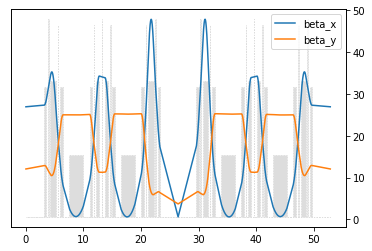

In [5]:
PlotLattice(lattice, ['beta_x', 'beta_y'])

Can adjust tune in a small range

In [6]:
print(lattice.tune_adjust(36.81, 11.34))


[dk/k F, dk/k D] = sensitivity_matrix.dot([dnux, dnuy])
[[0.00654194 0.00446834]
 [0.00403582 0.01504001]]

nux =       36.81081531019635
nuy =       11.339785034937423
curl_H =    1.9514189159907233e-07
I1 =        0.23648886963978305
I2 =        0.2603561680932872
I3 =        0.01097165301302913
I4 =        0.00014273131180403203
I5 =        3.201728771898607e-05
Js =        2.0005482155957712
Jx =        0.9994517844042285
Jy =        1
energy =    6000MeV
gamma =     11741.707101355101
sigma_e =   0.001054924984255604
emittance = 6.500440773501663 nm*rad
Length =    845.98976 m
U0 =        4750.506746596673  keV
Tperiod =   2821.9180986471715 nsec
alpha =     0.00027954105352541973
eta_p =     0.0002795338001941169
tau0 =      7.128295777713816 msec
tau_e =     3.563171195846925 msec
tau_x =     7.132205764145971 msec
tau_y =     7.128295777713816 msec
xi_x =     -68.73380516022021
xi_y =     -15.83139876172128
